In [1]:
!pip install mysql-connector

In [56]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp
import os
import pandas as pd
#
from mysql.connector import Error
import warnings
warnings.filterwarnings("ignore")

In [57]:
try:
    connection = mysql.connector.connect(host='127.0.0.1',
                                         database='bbjewels',
                                         user='root',
                                         password='abcde12345',
                                         auth_plugin = 'mysql_native_password')
    print("Connection successful!")
#
except Error as e:
    print("Error while connecting to MySQL", e)


Connection successful!


In [58]:
tables = ['cust_email', 'cust_purchase_orders', 'customer', 'damages', 'employee', 'factory', 
          'final_product', 'jewelry_maker', 'purchase_history', 'quality_check_recorder', 
          'refinery', 'repairer', 'stock_handling_team', 'sup_email', 'supplier', 'vault', 
          'wholesale_market']

# Loop through each table and read data into DataFrame
for table in tables:
    query = f'SELECT * FROM bbjewels.{table}'
    df = pd.read_sql(query, connection)
    # Assign the DataFrame to a variable dynamically
    globals()[f'{table}_df'] = df

In [59]:
vault_df.head()

,Vault_Key,Vault_Nr,Location,Material_Name,Material_Quantity,record_number
0,KEY_51343,VAL_16,Precious Metals Vault,Gold Bars,8.0,93743433
1,KEY_51649,VAL_29,Precious Metals Vault,Antique Artifacts,8.0,73885694
2,KEY_52117,VAL_2,Security Vault A,Silver Bullion,1.0,44851841
3,KEY_52253,VAL_52,Vault Room B,Gemstone Collection,10.0,27532567
4,KEY_52267,VAL_90,Armory,Gemstone Collection,3.0,58769378


In [60]:
supplier_df.head()

,Sup_ID,Material_ID,Sup_Name,Sup_Address,Sup_Type,Order_Type,Quantity_Supplied,Record_Number,Pur_id
0,SUP_3034,MAT_3,Constance Thornton,"Ap #522-5145 Arcu. Ave,Great Falls,Kansas,Unit...",Retailer,Express,59,72215097,PR 116
1,SUP_3283,MAT_96,Bruno Holland,"235-3619 Orci Avenue,Essex,Alabama,United States",Wholesaler,Standard,32,78692967,PR 110
2,SUP_3337,MAT_7,Lavinia Burton,"P.O. Box 324, 2569 Dictum Rd.,Kailua,Wyoming,U...",Wholesaler,Express,34,73776120,PR 123
3,SUP_3378,MAT_81,Hashim Vaughn,"209-3808 In Road,Idaho Falls,Ohio,United States",Retailer,Priority,95,83719201,PR 149
4,SUP_3444,MAT_43,Jerry Wilkerson,"811-9634 Id Rd.,Biloxi,Florida,United States",Wholesaler,Express,89,74326742,PR 124


In [61]:
vault_df.columns

Index(['Vault_Key', 'Vault_Nr', 'Location', 'Material_Name',
       'Material_Quantity', 'record_number'],
      dtype='object')

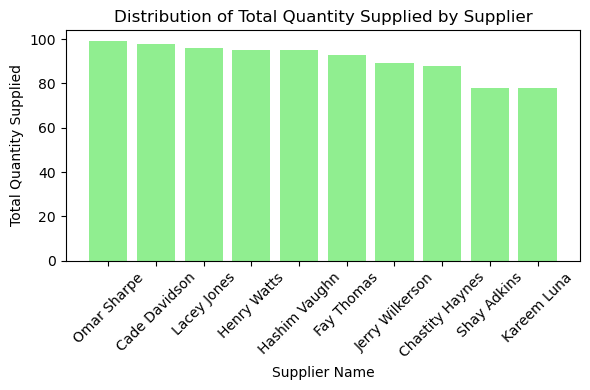

In [62]:
#This query finds the total quantity supplied by each supplier

# Define the SQL query
query = """
    SELECT s.Sup_Name, SUM(s.Quantity_Supplied) AS Total_Quantity_Supplied
    FROM SUPPLIER s
    GROUP BY s.Sup_Name
    ORDER BY Total_Quantity_Supplied DESC
    Limit 10;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(df['Sup_Name'], df['Total_Quantity_Supplied'], color='lightgreen')
plt.title('Distribution of Total Quantity Supplied by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Total Quantity Supplied')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

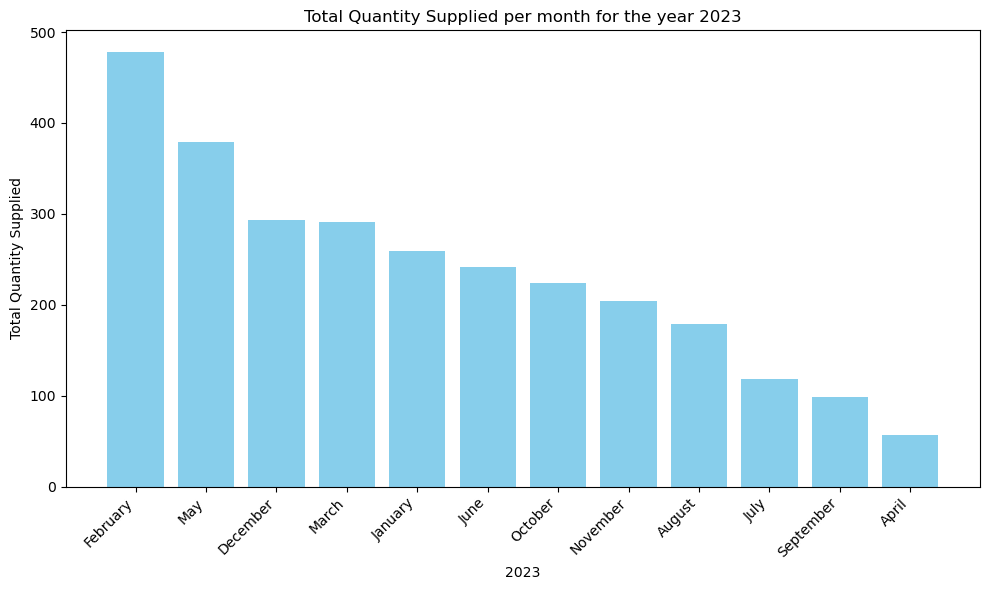

In [63]:
#This query is to find the total number of quantity supplied by suppliers for each month in the year 2023
query = """
WITH Monthly_Supply AS (
    SELECT 
        YEAR(q.Date) AS Year,
        MONTHNAME(q.Date) AS Month_Name,
        SUM(s.Quantity_Supplied) AS Total_Quantity_Supplied
    FROM 
        supplier s
    INNER JOIN 
        quality_check_recorder q ON s.Record_Number = q.Record_Number
    GROUP BY 
        YEAR(q.Date), MONTHNAME(q.Date))
SELECT 
    Year, 
    Month_Name, 
    Total_Quantity_Supplied
FROM 
    Monthly_Supply
ORDER BY 
    Total_Quantity_Supplied DESC
;
"""
# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Month_Name'], df['Total_Quantity_Supplied'], color='skyblue')
plt.title('Total Quantity Supplied per month for the year 2023')
plt.xlabel('2023')
plt.ylabel('Total Quantity Supplied')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

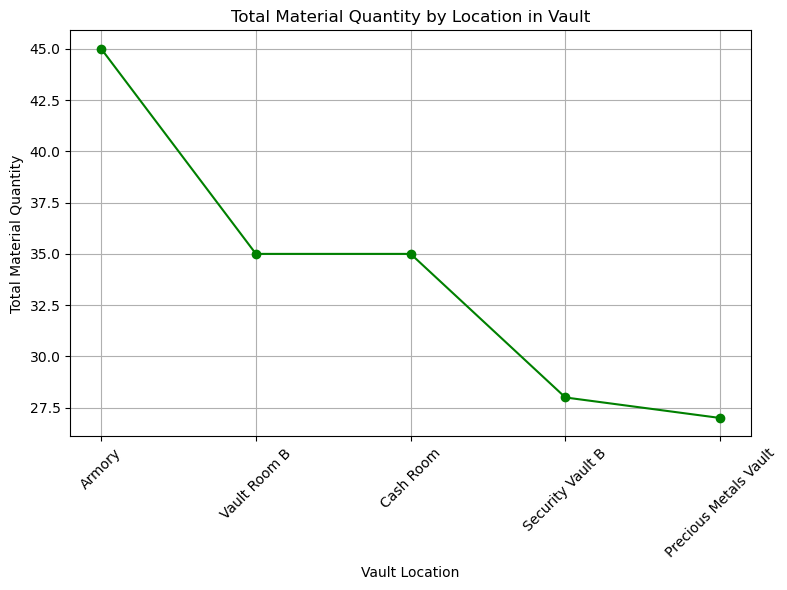

In [64]:
#This query find the total number of materials available in each vault's location 

# Define the SQL query
query = """
    SELECT Location as Vault_Location, SUM(Material_Quantity) AS Total_Material_Quantity
    FROM VAULT
    GROUP BY Location
    ORDER BY Total_Material_Quantity DESC
    limit 5;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting the line chart
plt.figure(figsize=(8, 6))
plt.plot(df['Vault_Location'], df['Total_Material_Quantity'], marker='o', color='green', linestyle='-')
plt.title('Total Material Quantity by Location in Vault')
plt.xlabel('Vault Location')
plt.ylabel('Total Material Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


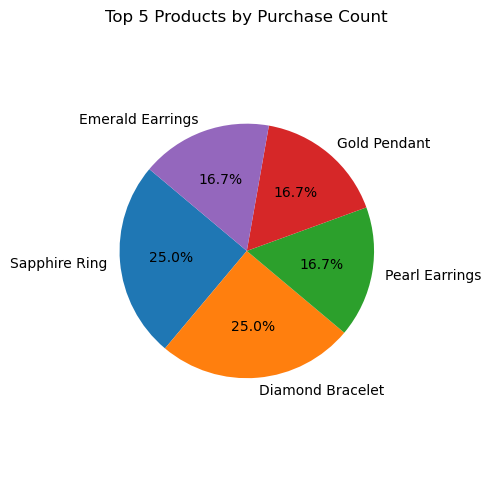

In [65]:
#This query returns the Top 5 products purchased by customers

# Define the SQL query
query = """
    SELECT Prod_Name, COUNT(*) AS Purchase_Count 
    FROM FINAL_PRODUCT 
    GROUP BY Prod_Name 
    ORDER BY Purchase_Count DESC 
    LIMIT 5;
"""

# Execute the query and read data into a DataFrame
df = pd.read_sql(query, connection)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(df['Purchase_Count'], labels=df['Prod_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Products by Purchase Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

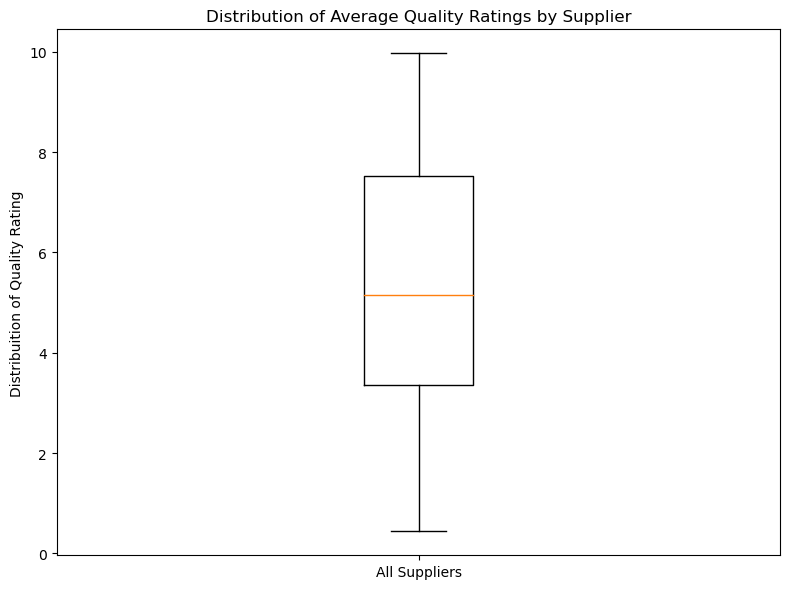

In [66]:
#Finding the distribuition of quality rating

# Define the SQL query to retrieve the average quality rating for each supplier
query = """
    SELECT Sup_Name, AVG(Quality_Rating) AS Avg_Quality_Rating
    FROM QUALITY_CHECK_RECORDER q
    JOIN supplier s ON q.Record_Number = s.Record_Number
    GROUP BY Sup_Name;
"""

# Execute the query and read data into a DataFrame
df_avg_quality = pd.read_sql(query, connection)

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_avg_quality['Avg_Quality_Rating'])
plt.title('Distribution of Average Quality Ratings by Supplier')
plt.ylabel('Distribuition of Quality Rating')
plt.xticks([1], ['All Suppliers'])
plt.tight_layout()
plt.show()
